The pipeline() function from the Hugging Face transformers library is the easiest and most popular way to use powerful pre-trained transformer models for inference — often in just 1–3 lines of code.
It automatically handles almost everything complex for you:

1. Model downloading & loading
2. Tokenizer / Processor loading
3. Input preprocessing
4. Model inference
5. Output post-processing

In [ ]:
from transformers import pipeline

#Sentiment Analysis

By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

1. The text is preprocessed into a format the model can understand.
2. The preprocessed inputs are passed to the model.
3. The predictions of the model are post-processed, so you can make sense of them.

In [ ]:
classifier = pipeline("sentiment-analysis")

classifier ( ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!","I have to buy a new phone but I need money"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455},
 {'label': 'NEGATIVE', 'score': 0.9990241527557373}]

The pipeline() function supports multiple modalities, allowing you to work with text, images, audio, and even multimodal tasks. In this course we’ll focus on text tasks, but it’s useful to understand the transformer architecture’s potential, so we’ll briefly outline it.

#Text pipelines
1. text-generation: Generate text from a prompt
2. text-classification: Classify text into predefined categories
3. summarization: Create a shorter version of a text while preserving key information
4. translation: Translate text from one language to another
5. zero-shot-classification: Classify text without prior training on specific labels
6. feature-extraction: Extract vector representations of text

#Image pipelines
1. image-to-text: Generate text descriptions of images
2. image-classification: Identify objects in an image
3. object-detection: Locate and identify objects in images

#Audio pipelines
1. automatic-speech-recognition: Convert speech to text
2. audio-classification: Classify audio into categories
3. text-to-speech: Convert text to spoken audio

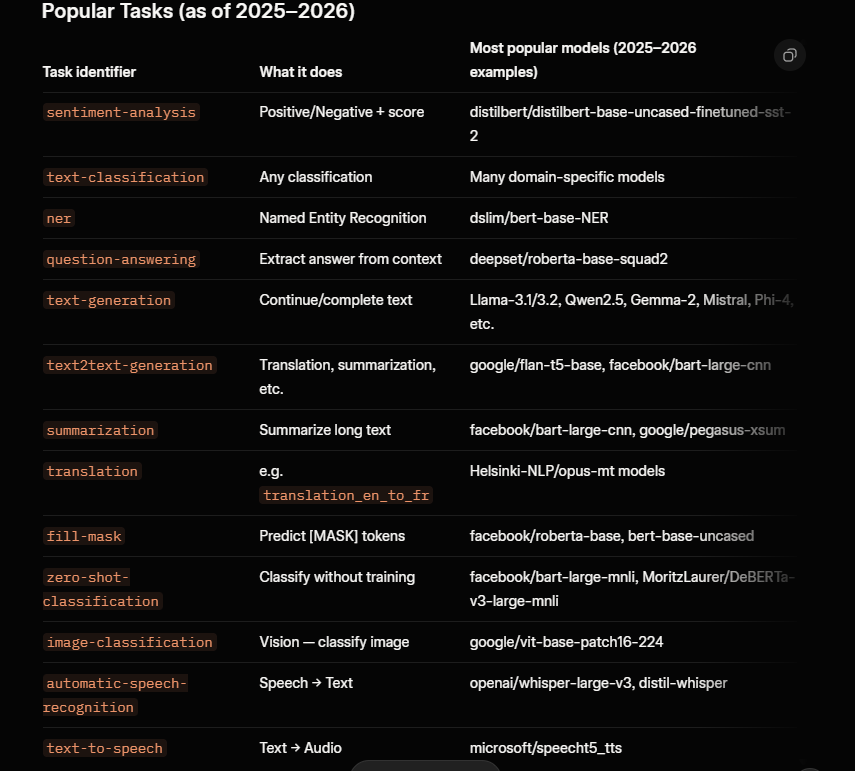

#Text Pipeline

In [ ]:
generator = pipeline("text-generation")
generator("Artificial Intelligence will ")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Artificial Intelligence will \xa0have to learn how to process, analyze and interact with data.\nThe world is a complex place with complex and complex systems. These systems are designed for the purpose of processing information quickly and efficiently. But how can you optimize and automate these systems and ensure that your data never gets lost?\nTo do this, we need a number of tools.\nThe first is a data integrity (DIB) tool, known as iSight.\nDIB can be an expensive tool (and often time consuming), but it\'s a very powerful tool. The iSight tool performs what\'s known as a "pass-through" operation. This means that if you can\'t find a data point within a single point, then you\'ll have to be very careful about which data points are available for analysis.\nThe second tool is an "analytic" tool (or "trying") that is designed to do the same thing. This means that every time you try to analyze a data point, it\'ll return a new point. When you try to analyze the same

In [ ]:
from transformers import pipeline

# Default = quite good distilled BERT model trained on SQuAD
qa = pipeline("question-answering",model="deepset/deberta-v3-large-squad2") #Given a context (piece of text) + a question
#The model finds & extracts the answer directly from the context

result = qa(
    question = "Who created Grok?",
    context  = "Grok is an AI created by xAI, founded by Elon Musk in 2023."
)

print(result)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.74G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.65M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.9444699845043942, 'start': 24, 'end': 29, 'answer': ' xAI,'}


In [ ]:
translator = pipeline("translation_en_to_fr")#English to French

translator = pipeline(
    "translation_en_to_fr",
    model="Helsinki-NLP/opus-mt-en-fr"
)

translator(["How is the weather today in Rangpur?","AQI of Dhaka today?"])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu
Device set to use cpu


[{'translation_text': "Comment se passe le temps aujourd'hui à Rangpur?"},
 {'translation_text': "AQI de Dhaka aujourd'hui ?"}]

In [ ]:
summarizer = pipeline("summarization",model="google/pegasus-cnn_dailymail")
text = """
Rangpur Division in northern Bangladesh experienced unusually cold weather in mid-January 2026.
Temperatures dropped to 8–10°C during the night, the lowest in the past 5 years.
Many residents reported difficulties due to thick fog, poor visibility, and inadequate winter clothing.
Local authorities distributed blankets and advised people to stay indoors during early morning hours.
The cold wave is expected to continue for another 4–5 days according to BMD.
"""
summarizer(text)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Your max_length is set to 128, but your input_length is only 85. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=42)


[{'summary_text': 'Rangpur Division in northern Bangladesh experienced unusually cold weather in mid-January 2026 .<n>Temperatures dropped to 8–10C during the night, the lowest in the past 5 years .<n>Many residents reported difficulties due to thick fog, poor visibility, and inadequate winter clothing .'}]

In [ ]:
unmasker = pipeline(
    "fill-mask",
    model="FacebookAI/roberta-large",     # or distilroberta-base for speed
    device=0,                             # GPU = 0, CPU = -1, Apple = "mps"
    # torch_dtype="auto"                  # optional: float16/bfloat16
)

print(unmasker("The capital of France is <mask>."))

# Multiple masks (works, but quality drops with more masks)
print(unmasker("The weather in <mask> is <mask> today.", top_k=3))

# Control how many predictions you want
print(unmasker("Panchagarh is famous for <mask>.", top_k=8))

Device set to use cpu


[{'score': 0.9935570359230042, 'token': 2201, 'token_str': ' Paris', 'sequence': 'The capital of France is Paris.'}, {'score': 0.0048535787500441074, 'token': 12790, 'token_str': ' Lyon', 'sequence': 'The capital of France is Lyon.'}, {'score': 0.00038530814344994724, 'token': 1470, 'token_str': ' France', 'sequence': 'The capital of France is France.'}, {'score': 0.00019608574802987278, 'token': 16911, 'token_str': ' Nice', 'sequence': 'The capital of France is Nice.'}, {'score': 0.00017717844457365572, 'token': 928, 'token_str': ' London', 'sequence': 'The capital of France is London.'}]
[[{'score': 0.035014551132917404, 'token': 928, 'token_str': ' London', 'sequence': '<s>The weather in London is<mask> today.</s>'}, {'score': 0.02229399047791958, 'token': 666, 'token_str': ' India', 'sequence': '<s>The weather in India is<mask> today.</s>'}, {'score': 0.0200797226279974, 'token': 2177, 'token_str': ' Toronto', 'sequence': '<s>The weather in Toronto is<mask> today.</s>'}], [{'score'

In [ ]:
#Zero-shot classifier allows you to classify text into any categories you want — without any training on those specific labels.

classifier = pipeline("zero-shot-classification",model = "MoritzLaurer/deberta-v3-large-zeroshot-v2.0")

print(classifier("The new smartphone has excellent battery life but the camera is quite average.", candidate_labels=["positive", "negative", "neutral", "mixed", "tech news"]))

## Multi-label classification (allow multiple true labels)
print(classifier(
    "This restaurant serves great vegan food and has amazing coffee.",
    candidate_labels=["food", "drinks", "expensive", "vegan", "bad service"],
    multi_label=True   # ← very important!
))

# Hypothesis template (sometimes improves results a lot!)
print(classifier(
    "Panchagarh is very cold in January.",
    candidate_labels=["weather report", "travel advice", "complaint"],
    hypothesis_template="This example is {}."   # can be very creative!
))

Device set to use cpu


{'sequence': 'The new smartphone has excellent battery life but the camera is quite average.', 'labels': ['tech news', 'mixed', 'neutral', 'negative', 'positive'], 'scores': [0.3246191740036011, 0.31463170051574707, 0.3008106052875519, 0.05652753636240959, 0.0034109423868358135]}
{'sequence': 'This restaurant serves great vegan food and has amazing coffee.', 'labels': ['vegan', 'food', 'drinks', 'expensive', 'bad service'], 'scores': [0.9763556122779846, 0.9629527926445007, 0.3662779927253723, 0.00027265484095551074, 0.00020422300440259278]}
{'sequence': 'Panchagarh is very cold in January.', 'labels': ['weather report', 'complaint', 'travel advice'], 'scores': [0.6057021021842957, 0.2003253996372223, 0.19397251307964325]}


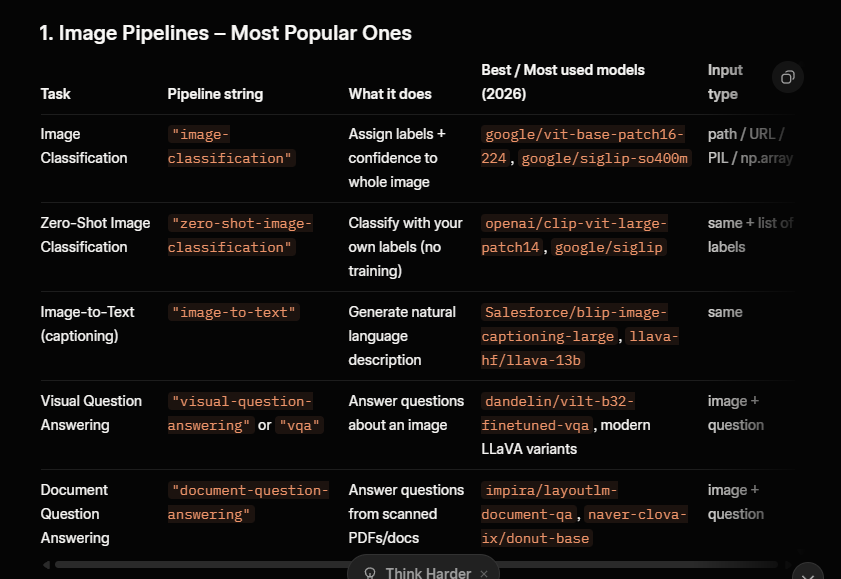

In [ ]:
from PIL import Image
import requests
classifier = pipeline(
    task="image-classification", model="google/vit-base-patch16-224"
)#Model outputs probabilities over a fixed set of classes it was trained on

image_path = "/content/G6br8sjagAAZf0l.jpeg"   # ← must be real file

image = Image.open(image_path)

classifier(image)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


[{'label': 'vestment', 'score': 0.16593711078166962},
 {'label': 'neck brace', 'score': 0.13136936724185944},
 {'label': 'wig', 'score': 0.045148298144340515},
 {'label': 'panpipe, pandean pipe, syrinx', 'score': 0.018827447667717934},
 {'label': 'sombrero', 'score': 0.013576280325651169}]

In [ ]:
zero_shot = pipeline(
    "zero-shot-image-classification",
    model="google/siglip-so400m-patch14-384"   # or openai/clip-vit-large-patch14
)# Model computes similarity between image and any text descriptions you provide

image = Image.open("/content/7147.jpg")
zero_shot(
    image,
    candidate_labels=[
        "winter fog",
        "mountain landscape",
        "Ice land",
        "city street",
        "rice field",
        "forest"
    ]
)


Device set to use cpu


[{'score': 0.3051084280014038, 'label': 'winter fog'},
 {'score': 0.006682353559881449, 'label': 'mountain landscape'},
 {'score': 0.00583791546523571, 'label': 'Ice land'},
 {'score': 0.003099465509876609, 'label': 'forest'},
 {'score': 7.037912723717454e-07, 'label': 'rice field'},
 {'score': 7.628043618979063e-08, 'label': 'city street'}]

In [ ]:
image = Image.open("/content/7147.jpg")

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")
captioner(image)

Device set to use cpu


[{'generated_text': 'snowy landscape with trees and a pink sky in the background'}]

In [ ]:
image = Image.open("/content/G6br8sjagAAZf0l.jpeg")

vqa = pipeline("visual-question-answering")

vqa(
    image,
    question="What the image all about?",
    #top_k=3
)

No model was supplied, defaulted to dandelin/vilt-b32-finetuned-vqa and revision d0a1f6a (https://huggingface.co/dandelin/vilt-b32-finetuned-vqa).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'score': 0.06624423712491989, 'answer': 'hair'},
 {'score': 0.06571021676063538, 'answer': 'selfie'},
 {'score': 0.046378642320632935, 'answer': 'man'},
 {'score': 0.024553528055548668, 'answer': 'angry'},
 {'score': 0.01905948296189308, 'answer': 'haircut'}]

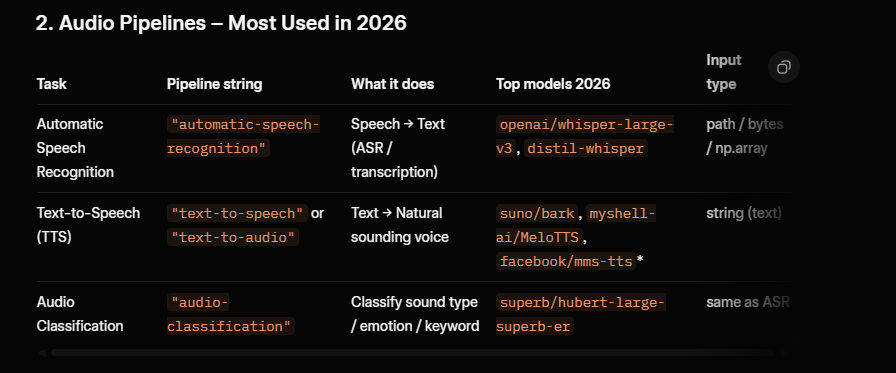

In [ ]:
from transformers import pipeline

transcriber = pipeline(
    task="automatic-speech-recognition", model="openai/whisper-large-v3"
)
result = transcriber(
    "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"
)
print(result)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

normalizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

Device set to use cpu
`return_token_timestamps` is deprecated for WhisperFeatureExtractor and will be removed in Transformers v5. Use `return_attention_mask` instead, as the number of frames can be inferred from it.
Using custom `forced_decoder_ids` from the (generation) config. This is deprecated in favor of the `task` and `language` flags/config options.
Transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English. This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`. See https://github.com/huggingface/transformers/pull/28687 for more details.


All these Hugging Face pipeline() tasks (text, image, audio) are heavily used in real modern applications in 2026. It integrates easily with FastAPI, Streamlit, Gradio, mobile edge (via ONNX/ExecuTorch), cloud inference endpoints, etc.

The pipeline() is no longer just for notebooks — it's frequently the first version of production inference code in thousands of companies worldwide.

Hugging Face pipeline() is very commonly used in small chatbots, personal projects, demo websites, educational tools, and even lightweight production apps (especially in 2025–2026).

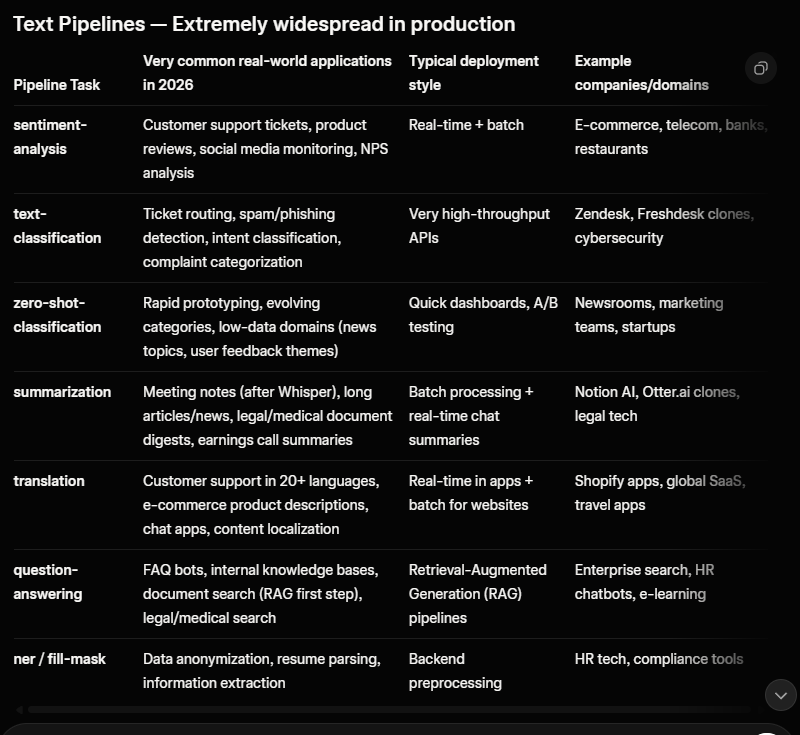

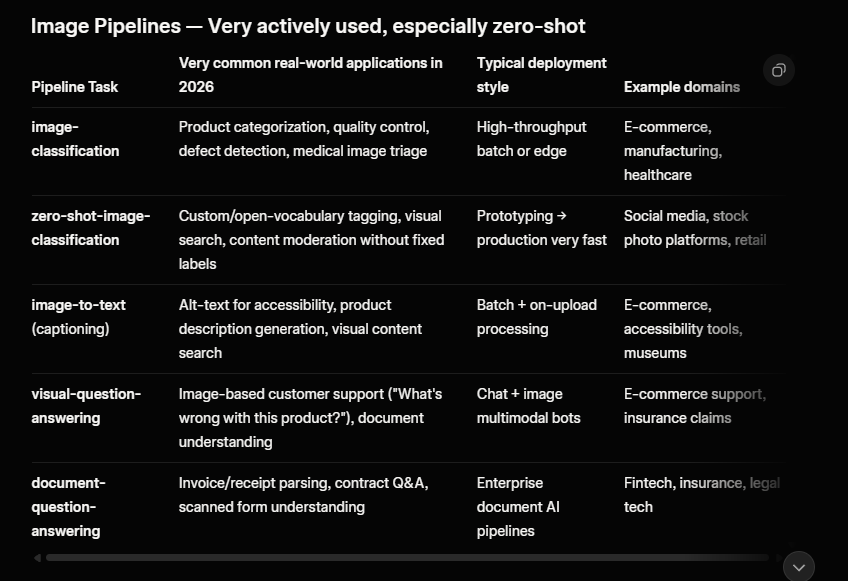

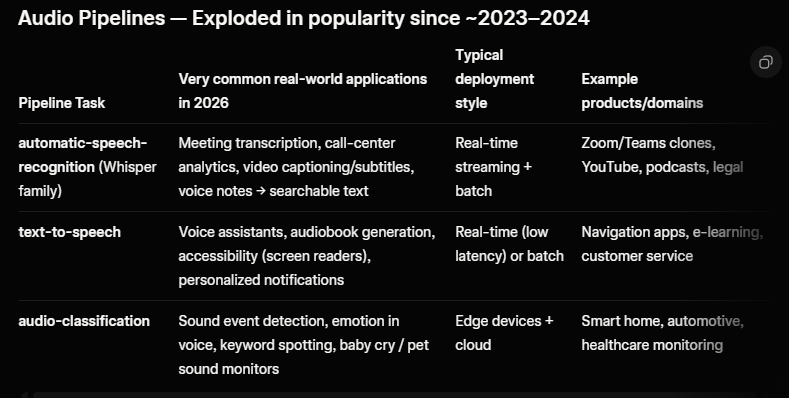

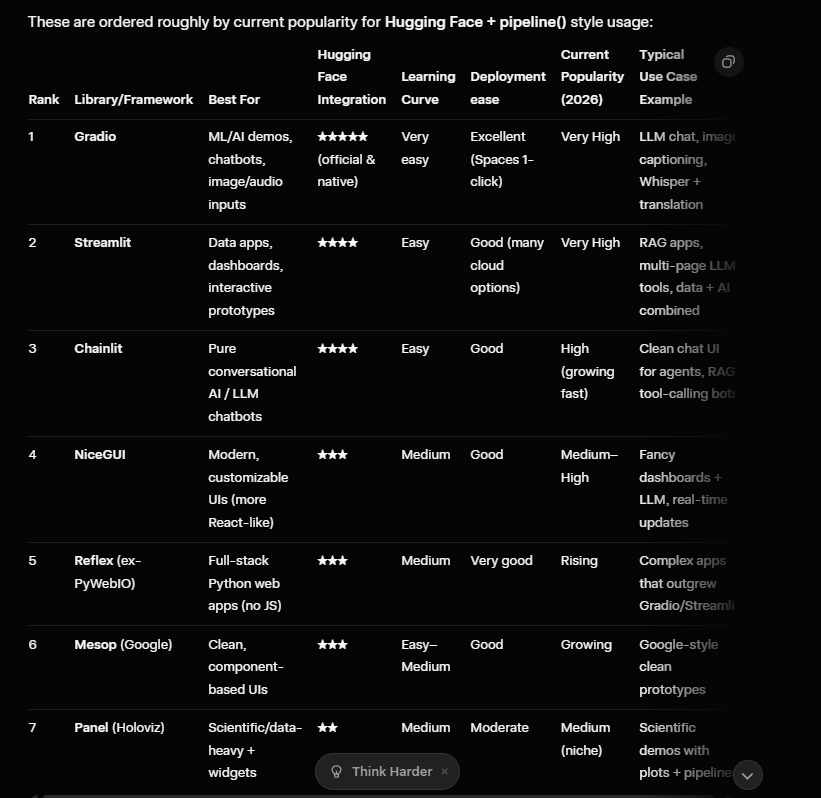

In [ ]:
# Typical small chatbot in ~10 lines (Gradio + pipeline)
import gradio as gr
from transformers import pipeline

chat_pipe = pipeline("text-generation", model="Qwen/Qwen2.5-1.5B-Instruct")

def chatbot(message, history):
    prompt = f"User: {message}\nAssistant:"
    response = chat_pipe(prompt, max_new_tokens=100)[0]['generated_text']
    return response.split("Assistant:")[-1].strip()

gr.ChatInterface(chatbot).launch()